# Linear Regression Analysis
*Linear regression analysis using Pandas, StatsModels, and Altiar.*

**Attribution Notes**:
* Much of this analysis was inspired by [Cognitir](http://www.cognitir.com/)'s [Introduction to Data Science for Finance](http://www.cognitir.com/courses/data-science) course, which I attended at the Ohio State University in November 2016. I generated this notebook using notes I took during the couse to practice what I learned and add some other functions useful to me. The course provides a much more detailed presentation of the material, and I highly recommend it. I encourage you to [contact them](http://www.cognitir.com/contact) for more information.
* [Chris Albon](http://chrisalbon.com/python/pandas_join_merge_dataframe.html)'s blog is always a great resouce for questions about Pandas. 

## Simple Linear Regression
*Linear regression to predict the dependent variable using one independent variable.* 

See more information on [Wikipedia here](https://en.wikipedia.org/wiki/Simple_linear_regression).

In [ ]:
##### NEED SIMPLE LINEAR REGRESSION EXAMPLE

## Multiple Linear Regression
*Linear regression to predict the dependent variable using multiple (including categorical) independent variables.*

See [this post from DataRobot](https://www.datarobot.com/blog/multiple-regression-using-statsmodels/) and [Scipy Lecture Notes](http://www.scipy-lectures.org/packages/statistics/auto_examples/plot_regression_3d.html) for examples.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from altair import *

df_adv = pd.read_csv('data/Advertising.csv', parse_dates=True, index_col=0)
df_adv.head()

,Facebook,Twitter,LinkedIn,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
X = df_adv[['Facebook', 'Twitter','LinkedIn']]
Y = df_adv['Sales']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 12 Nov 2016   Prob (F-statistic):           1.58e-96
Time:                        20:30:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000         2.324     3.554
Facebook       0.0458      0.001     32.809      0.000         0.043     0.049
Twitter        0.1885      0.009     21.893      0.000         0.172     0.206
LinkedIn      -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
df_reg = pd.DataFrame({ 'X' : range(1, 300 + 1 ,1)})
df_reg[['Facebook-reg']] = df_reg[['X']] * model.params[1]
df_reg[['Twitter-reg']] = df_reg[['X']] * model.params[2]
df_reg[['LinkedIn-reg']] = df_reg[['X']] * model.params[3]

df_reg.head()

,X,Facebook-reg,Twitter-reg,LinkedIn-reg
0,1,0.045765,0.18853,-0.001037
1,2,0.091529,0.37706,-0.002075
2,3,0.137294,0.56559,-0.003112
3,4,0.183059,0.75412,-0.004150
4,5,0.228823,0.94265,-0.005187


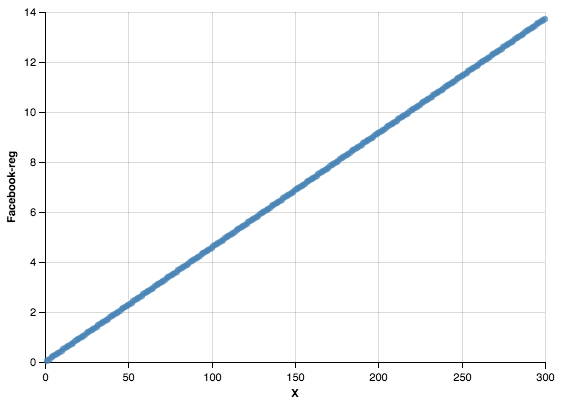

In [4]:
Chart(df_reg).mark_circle().encode(
    x='X',
    y='Facebook-reg',
)

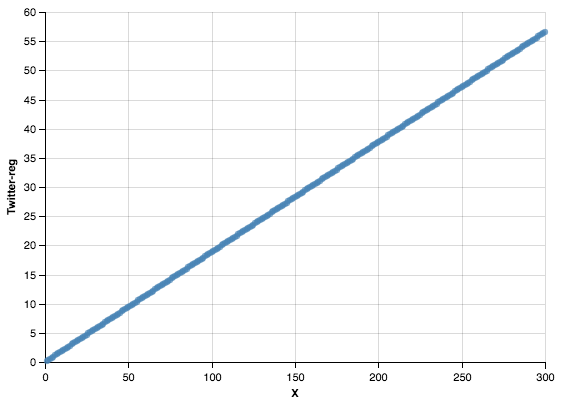

In [5]:
Chart(df_reg).mark_circle().encode(
    x='X',
    y='Twitter-reg',
)

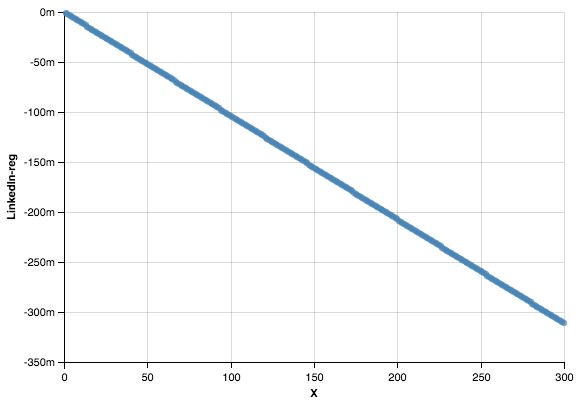

In [6]:
Chart(df_reg).mark_circle().encode(
    x='X',
    y='LinkedIn-reg',
)

# Credit

In [7]:
import statsmodels.formula.api as smf

df_crd = pd.read_csv('data/Credit.csv', parse_dates=True, index_col=0)
df_crd.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [9]:
model = smf.ols(formula='Rating ~ Income + Limit + Cards + Age + Education + C(Gender) + C(Student) + '
                'C(Married) + C(Ethnicity) + Balance', data=df_crd).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     8399.
Date:                Sun, 13 Nov 2016   Prob (F-statistic):               0.00
Time:                        10:55:56   Log-Likelihood:                -1488.4
No. Observations:                 400   AIC:                             3001.
Df Residuals:                     388   BIC:                             3049.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                    32.0084      4.136      7.739      0.000        23.877    40.140
C(Gender)[T.Female]           0.2204      1.020      0.216      0.829        -1.785     2.225
C(Student)[T.Yes]            -2.0068      2.805     -0.715      0.475        -7.522     3.508
C(Married)[T.Yes]             2.3823      1.058      2.251      0.025         0.301     4.463
C(Ethnicity)[T.Asian]        -2.0062      1.449     -1.384      0.167        -4.856     0.843
C(Ethnicity)[T.Caucasian]    -0.3096      1.255     -0.247      0.805        -2.777     2.158
Income                        0.1239      0.047      2.644      0.009         0.032     0.216
Limit                         0.0632      0.001     44.309      0.000         0.060     0.066
Cards                         4.5967      0.391     11.756      0.000         3.828     5.365
Age                           0.0126      0.030      0.415      0.679        -0.047     0.072
Education                    -0.2349      0.164     -1.434      0.152        -0.557     0.087
Balance                       0.0120      0.005      2.315      0.021         0.002     0.022
==============================================================================
Omnibus:                        6.295   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.637
Skew:                           0.226   Prob(JB):                       0.0597
Kurtosis:                       2.633   Cond. No.                     4.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the results, we see that the following attributes contribute to a higher credit rating:
- being female
- not being a student
- being married
- not being Asian or Caucasian
- having a higher income
- having a higher credit limit
- having more cards
- being older
- not having more education
- having a higher balance